In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [14]:
start = '2012-01-01'
end = '2022-12-21'

stock = 'GOOG'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [15]:
data.reset_index(inplace=True)

In [16]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.201660,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.096336,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.756721,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.048668,23020500


In [17]:
ma_100_days = data.Close.rolling(100).mean()

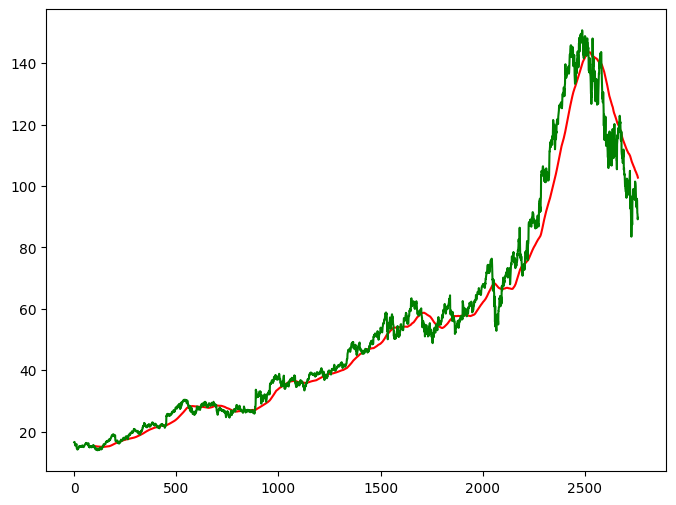

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [19]:
ma_200_days = data.Close.rolling(200).mean()

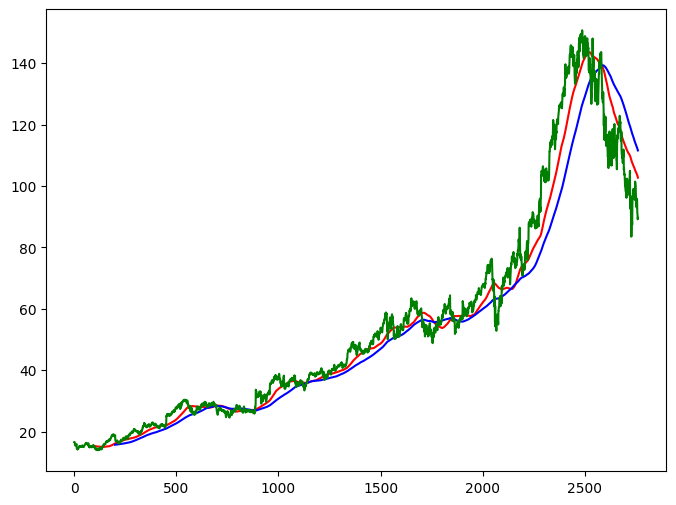

In [20]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [21]:
data.dropna(inplace=True)

In [22]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [23]:
data_train.shape[0], data_test.shape[0]

(2208, 553)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_train_scale = scaler.fit_transform(data_train)

In [26]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100: i])
    y.append(data_train_scale[i, 0])

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
66/66 [==============================] - 28s 303ms/step - loss: 0.0311
Epoch 2/50
66/66 [==============================] - 21s 325ms/step - loss: 0.0071
Epoch 3/50
66/66 [==============================] - 20s 305ms/step - loss: 0.0074
Epoch 4/50
66/66 [==============================] - 22s 335ms/step - loss: 0.0071
Epoch 5/50
66/66 [==============================] - 20s 307ms/step - loss: 0.0052
Epoch 6/50
66/66 [==============================] - 22s 327ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 20s 302ms/step - loss: 0.0047
Epoch 8/50
66/66 [==============================] - 22s 327ms/step - loss: 0.0041
Epoch 9/50
66/66 [==============================] - 20s 304ms/step - loss: 0.0044
Epoch 10/50
66/66 [==============================] - 21s 326ms/step - loss: 0.0039
Epoch 11/50
66/66 [==============================] - 22s 334ms/step - loss: 0.0044
Epoch 12/50
66/66 [==============================] - 22s 338ms/step - loss: 0.0038
Epoch 13/50
6

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
pas_100_days = data_train.tail(100)

In [35]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [36]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [37]:
data_test_scale = scaler.fit_transform(data_test)

In [38]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100: i])
    y.append(data_test_scale[i, 0])

In [39]:
x, y = np.array(x), np.array(y)

In [40]:
y_predict = model.predict(x)

18/18 [==============================] - 3s 139ms/step


In [44]:
scale = 1/scaler.scale_

In [45]:
y_predict = y_predict * scale

In [46]:
y = y*scale

In [52]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [54]:
mse = mean_squared_error(y, y_predict)
mae = mean_absolute_error(y, y_predict)
rmse = np.sqrt(mse)

In [55]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 29.58708139210839
Mean Absolute Error (MAE): 4.472412232238204
Root Mean Squared Error (RMSE): 5.4394008302485295


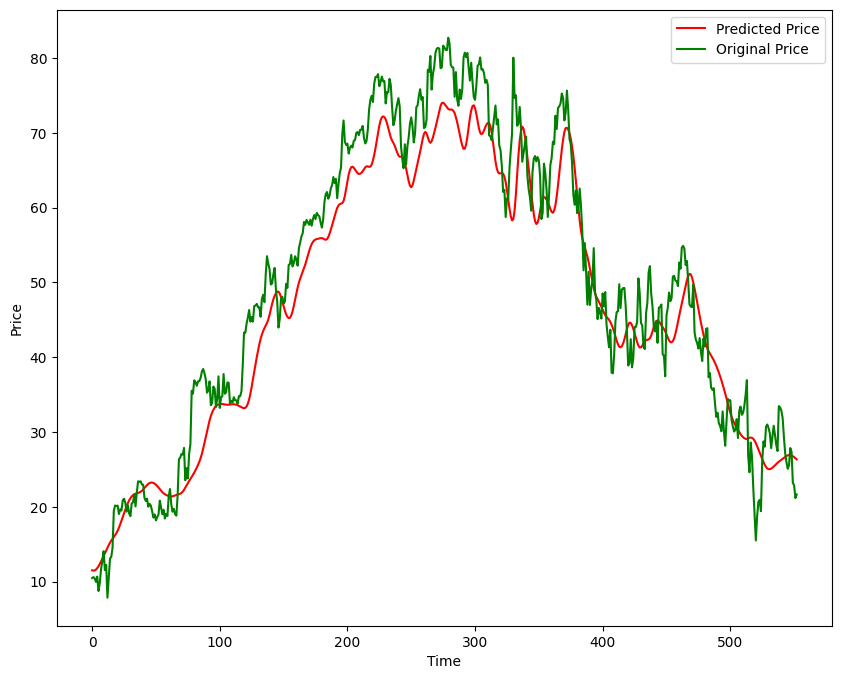

In [47]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [56]:
model.save('Stock Predictions Model.keras')